<a href="https://colab.research.google.com/github/gtgindia/Google-Colab-ML/blob/master/stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import pandas as pd


In [0]:
df = pd.read_csv("/content/data_csv.csv")

In [0]:
df.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


In [0]:
df['returns'] = 0
for i in range(1, len(df)):
    df.loc[i, 'returns'] = ((df.loc[i, 'SP500'] - df.loc[i-1, 'SP500'] )/ df.loc[i-1, 'SP500'])*1200

In [0]:
df.returns

0        0.000000
1       16.216216
2       29.333333
3       33.839479
4       30.379747
          ...    
1763    32.725043
1764    56.506302
1765   -36.406911
1766    -1.060196
1767   -26.896850
Name: returns, Length: 1768, dtype: float64

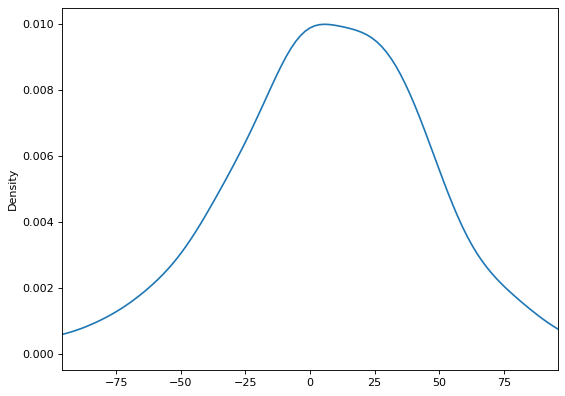

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlim([-96, 96])
df.returns.plot.kde()

In [0]:
df.returns.describe()

count    1768.000000
mean        5.327754
std        48.693709
min      -317.684887
25%       -18.151463
50%         7.461533
75%        32.766364
max       603.592814
Name: returns, dtype: float64

In [0]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme","powerlaw"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [0]:
get_best_distribution(df.returns)

p value for norm = 1.368937594469497e-07
p value for exponweib = 1.588056188727478e-86
p value for weibull_max = 0.0
p value for weibull_min = 0.0
p value for pareto = 0.0


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for genextreme = 0.0
p value for powerlaw = 0.0
Best fitting distribution: norm
Best p value: 1.368937594469497e-07
Parameters for the best fit: (5.327754188634, 48.67993573003641)


('norm', 1.368937594469497e-07, (5.327754188634, 48.67993573003641))

In [0]:
!python levy.py install

python3: can't open file 'levy.py': [Errno 2] No such file or directory
